In [1]:
#from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipyleaflet import *
from ipyleaflet.velocity import Velocity
import os
import numpy as np
import glob
 
%matplotlib widget


In [2]:
#file =  os.path.expanduser(f'/home/james/workspace/logs/TrackLogs/20210904Thunderhill5mile/summary.txt')
file =  os.path.expanduser(f'/home/james/workspace/logs/TrackLogs/20211001ThunderhillWestCW/session6.csv')



In [3]:
result_folder = os.path.expanduser(f'/home/james/workspace/logs/TrackLogs/20211001ThunderhillWestCW')
all_files = glob.glob(result_folder+ "/session*.csv")


summary_df = None

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['session'] = int(filename.split('session')[1].split('.csv')[0])
#    df.set_index('row')

    if summary_df is None:
        summary_df = df
    else:
        summary_df = summary_df.append(df)

/tmp/ipykernel_4038/3787667139.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(df)
/tmp/ipykernel_4038/3787667139.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(df)
/tmp/ipykernel_4038/3787667139.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(df)
/tmp/ipykernel_4038/3787667139.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(df)
/tmp/ipykernel_4038/3787667139.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [4]:
summary_df

,global_time,run_mode,lap,segment,lap_time,segment_time,GPStimestamp,latitude,longitude,altitude,gps_qual,mode_fix_type,num_sats,true_track,groundspeed,accel_x,accel_y,accel_z,session
0,33.084193,circuit,0.0,0.0,0.000,0.000,589058800.0,0.000000,0.000000,-17.000,0.0,0.0,0.0,0.0,0.000,-0.0,-0.0,0.0,4
1,33.135243,circuit,0.0,0.0,0.048,0.048,589058840.0,0.000000,0.000000,-17.000,0.0,0.0,0.0,0.0,0.000,-0.0,-0.0,0.0,4
2,33.187515,circuit,0.0,0.0,0.099,0.099,589058920.0,0.000000,0.000000,-17.000,0.0,0.0,0.0,0.0,0.000,-0.0,-0.0,0.0,4
3,33.238464,circuit,0.0,0.0,0.149,0.149,589058960.0,0.000000,0.000000,-17.000,0.0,0.0,0.0,0.0,0.000,-0.0,-0.0,0.0,4
4,33.291034,circuit,0.0,0.0,0.201,0.201,589059000.0,0.000000,0.000000,-17.000,0.0,0.0,0.0,0.0,0.000,-0.0,-0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33810,1383.526001,circuit,5.0,1.0,462.163,462.163,576274000.0,39.537422,-122.338207,98.469,2.0,3.0,16.0,0.0,4.470,-0.0,-0.0,0.0,1
33811,1383.556536,circuit,5.0,1.0,462.193,462.193,576274040.0,39.537424,-122.338207,98.480,2.0,3.0,16.0,0.0,4.467,-0.0,-0.0,0.0,1
33812,1383.607349,circuit,5.0,1.0,462.244,462.244,576274080.0,39.537425,-122.338207,98.485,2.0,3.0,16.0,0.0,4.478,-0.0,-0.0,0.0,1
33813,1383.637854,circuit,5.0,1.0,462.274,462.274,576274120.0,39.537427,-122.338207,98.489,2.0,3.0,16.0,0.0,4.421,-0.0,-0.0,0.0,1


In [5]:
#df = pd.read_csv(file)
#summary_df['u_spd'] = summary_df.groundspeed * np.sin(summary_df.true_track)
#summary_df['v_spd']  = summary_df.groundspeed * np.cos(summary_df.true_track)


In [6]:
#summary_df[summary_df.lap!=0].groupby(['session','lap']).lap_time.max().nsmallest(100)
day_summary = summary_df[summary_df.lap!=0].groupby(['session','lap']).lap_time.max().unstack(level=0)#.nsmallest(100)
day_summary.style.highlight_min(color = 'blue')

session,1,2,3,4,5,6
lap,,,,,,
1.000000,163.839000,159.079000,292.201000,125.075000,244.772000,149.238000
2.000000,129.368000,110.402000,124.359000,112.801000,111.398000,97.688000
3.000000,131.756000,118.758000,142.843000,116.674000,106.712000,109.954000
4.000000,126.993000,108.597000,107.111000,106.842000,103.609000,101.121000
5.000000,462.274000,108.884000,105.647000,104.440000,103.431000,96.922000
6.000000,nan,102.762000,106.158000,105.161000,103.243000,98.639000
7.000000,nan,110.477000,323.637000,103.887000,102.801000,98.966000
8.000000,nan,161.513000,nan,103.160000,119.438000,100.560000
9.000000,nan,nan,nan,105.320000,103.040000,98.273000


In [7]:
#ax.scatter3D(df.longitude, df.latitude, df.groundspeed)
ref = summary_df[(summary_df.session==2)&(summary_df.lap==6)]
test = summary_df[(summary_df.session==6)&(summary_df.lap==5)]


In [8]:
# Testline is blue
# Refline is red

test_coords = test[['latitude', 'longitude']].values.tolist()
ref_coords = ref[['latitude', 'longitude']].values.tolist()

center = ((ref.latitude.max()+ref.latitude.min())/2, (ref.longitude.max()+ref.longitude.min())/2)

#m = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=17)
m = Map(basemap=basemaps.Esri.WorldImagery,center=center, zoom=18)
m.layout.height = '2000px'

#marker = Marker(location=center, draggable=True)
# m.add_layer(marker)

testline = Polyline(locations=test_coords,
                    color='#0000fF', fill=False, weight=2, opacity=0.8)
refline = Polyline(locations=ref_coords,
                   color='#ff0000', fill=False, weight=2, opacity=0.8)
m.add_layer(testline)
m.add_layer(refline)

# Now that the marker is on the Map, you can drag it with your mouse,
# it will automatically update the `marker.location` attribute in Python

# You can also update the marker location from Python, that will update the
# marker location on the Map:
#marker.location = (50, 356)
#m.save('my_map.html', title='My Map')
display(m)
#m.save('20211002ThunderhillWestCW.html')


Map(center=[39.53701195, -122.34040435], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_t…

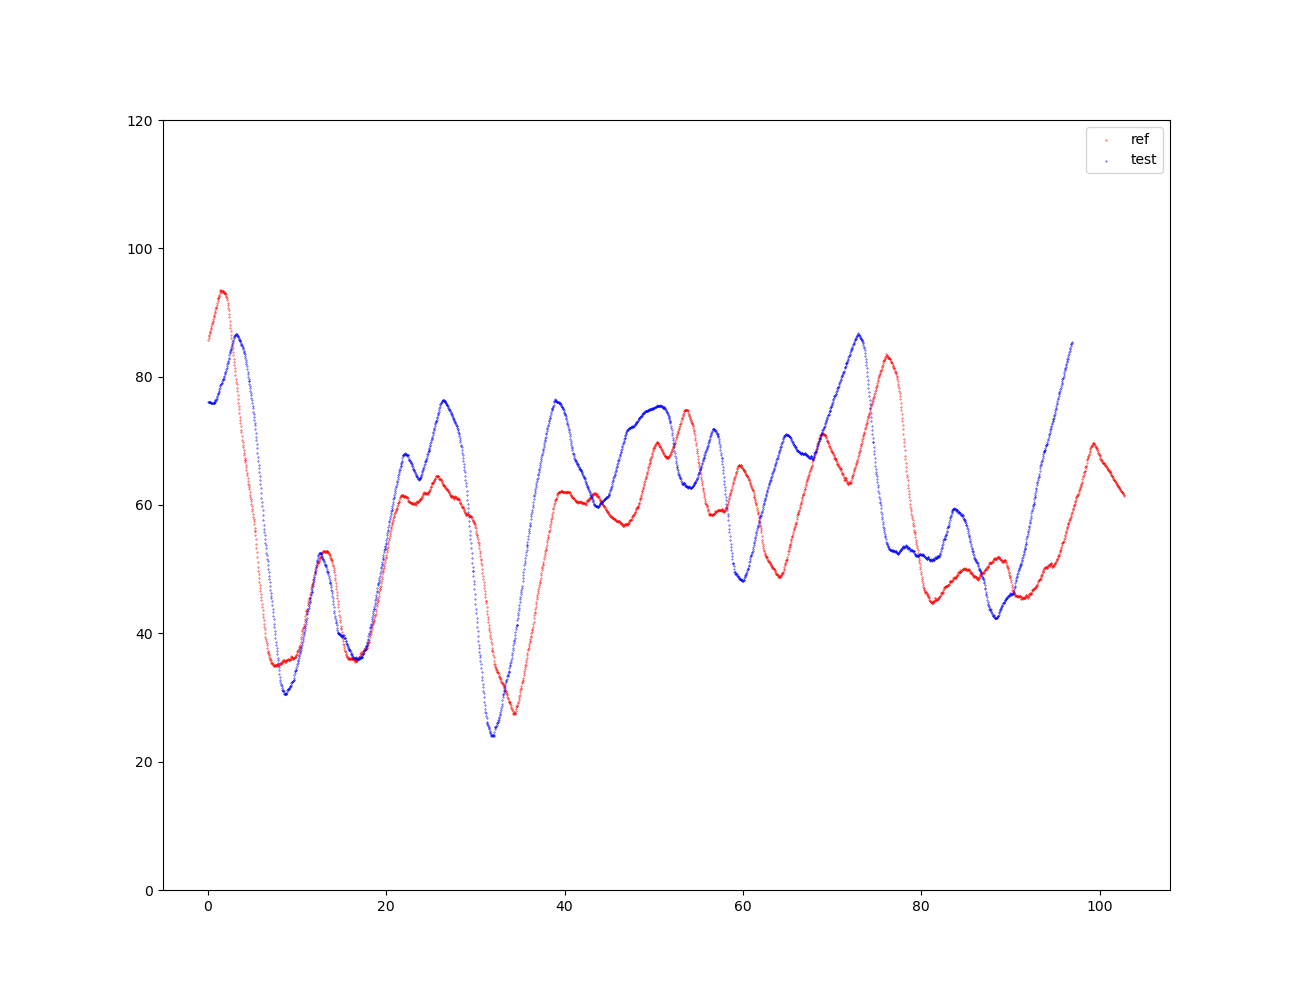

In [9]:
plt.figure(figsize=(13, 10))

plt.scatter(ref.lap_time, ref.groundspeed*2.23694, s=0.1, color='red')
plt.scatter(test.lap_time, test.groundspeed*2.23694, s=0.1, color='blue')
plt.legend(['ref','test'])
plt.ylim((0,120))

plt.show()

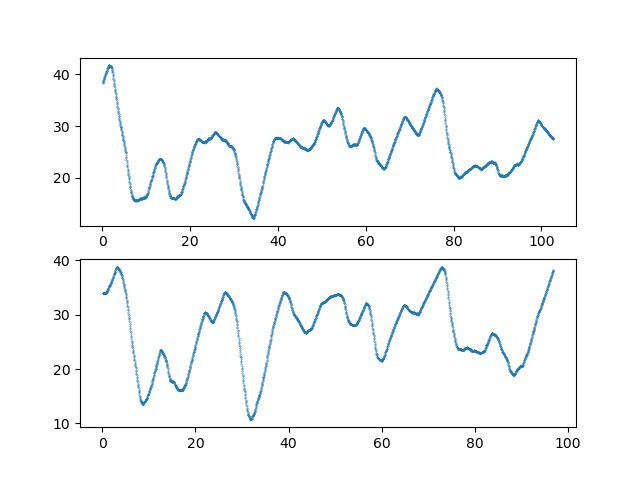

In [10]:

fig, ax = plt.subplots(2)

ax[0].scatter(ref.lap_time, ref.groundspeed, s=0.1)
ax[1].scatter(test.lap_time, test.groundspeed, s=0.1)


plt.show()